# PI IV - MACHINE LEARNING

### ***EFETUANDO A AUTENTICAÇÃO NO BIG QUERY DO GOOGLE CLOUD PLATFORM ***

In [ ]:
#Observação * Tem que logar/autenticar com A CONTA DO GRUPOFATEC777 para conseguir carregar do BigQuery ou fazer algo com GCP

from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

# ID DO PROJETO
id_projeto = 'ID_PROJETO_GCP'

# Criação do cliente BigQuery com o ID do projeto
client = bigquery.Client(project=id_projeto)

# Conjunto de dados
dataset_ref = client.dataset('db_vendas')

# Tabela a ser utilizada
tabela_vendas = dataset_ref.table('tb_vendas')


# CarregANDO a tabela em um DataFrame do Pandas
tabela = client.get_table(tabela_vendas)
df_vendas_dw = client.list_rows(tabela).to_dataframe()
df_vendas_dw.head(1)

df_vendas_dw.to_csv('/content/vendas.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt

In [ ]:
df_vendas_dw =  pd.read_csv('/content/vendas.csv')

<ipython-input-3-67e5731067ea>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vendas_dw =  pd.read_csv('/content/vendas.csv')


In [ ]:
df_vendas_dw.head(1)

,Fatura_Cod,Produto,Quantidade,Preco_Unitario,Fatura_Total,Data,Cliente_Cod,Dist_Cod
0,9352692,CHESS SET,1,27.99,27.99,27/05/2024 11:15,708873183,76695-102496


#### **Previsão de venda utilizando o modelo ARIMA (AUTOREGRESSIVE INTEGRATED MOVING AVERAGE)**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


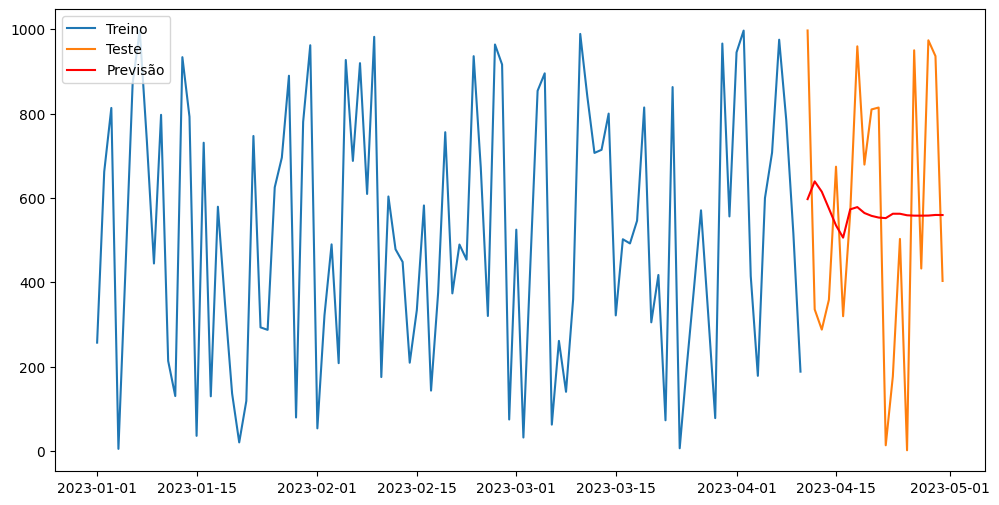

In [ ]:
# DataFrame
data = pd.DataFrame({
    'Data': pd.date_range(start='2023-01-01', periods=120, freq='D'),
    'Fatura_Total': np.random.rand(120) * 1000
})

# Convertendo a coluna 'Data' para índice
data.set_index('Data', inplace=True)

# Dividindo os dados em treino e teste
train = data.iloc[:-20]
test = data.iloc[-20:]

# Ajustando o modelo ARIMA
model = ARIMA(train['Fatura_Total'], order=(5, 1, 0))
model_fit = model.fit()

# Fazendo previsões
forecast = model_fit.forecast(steps=20)
forecast_index = test.index

# Visualizando os resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Fatura_Total'], label='Treino')
plt.plot(test.index, test['Fatura_Total'], label='Teste')
plt.plot(forecast_index, forecast, label='Previsão', color='red')
plt.legend(loc='upper left')
plt.show()

#### **Utilizando Kmeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


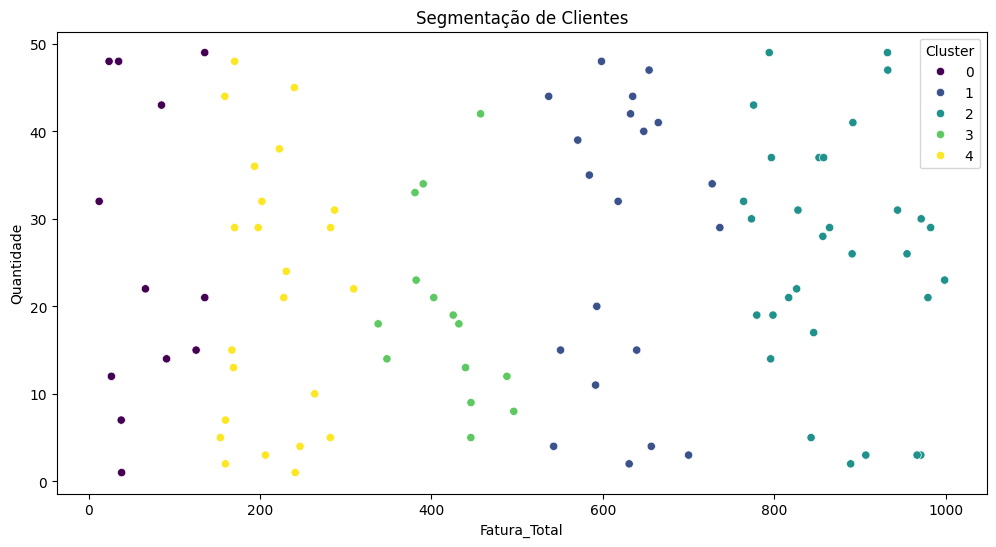

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

# Exemplo de dados de clientes
clientes_data = pd.DataFrame({
    'Cliente_Cod': range(1, 101),
    'Fatura_Total': np.random.rand(100) * 1000,
    'Quantidade': np.random.randint(1, 50, size=100)
})

# Ajustando o modelo K-Means
X = clientes_data[['Fatura_Total', 'Quantidade']]
kmeans = KMeans(n_clusters=5, random_state=0)
clientes_data['Cluster'] = kmeans.fit_predict(X)

# Visualizando os clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fatura_Total', y='Quantidade', hue='Cluster', data=clientes_data, palette='viridis')
plt.title('Segmentação de Clientes')
plt.show()

Recomendacoes de produtos

In [ ]:
#A FAZER

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357246 sha256=fd1f5cc6889cd3c74090f3d8233df6d2b60a0968892a63c09eaaa4eb8c6365c5
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


##### **Previsões que fazem uso de Treinamento**

##### **Prevendo valores de vendas para o mês de Janeiro do ano de 2022**

Erro médio quadrático: 14629.537061141971


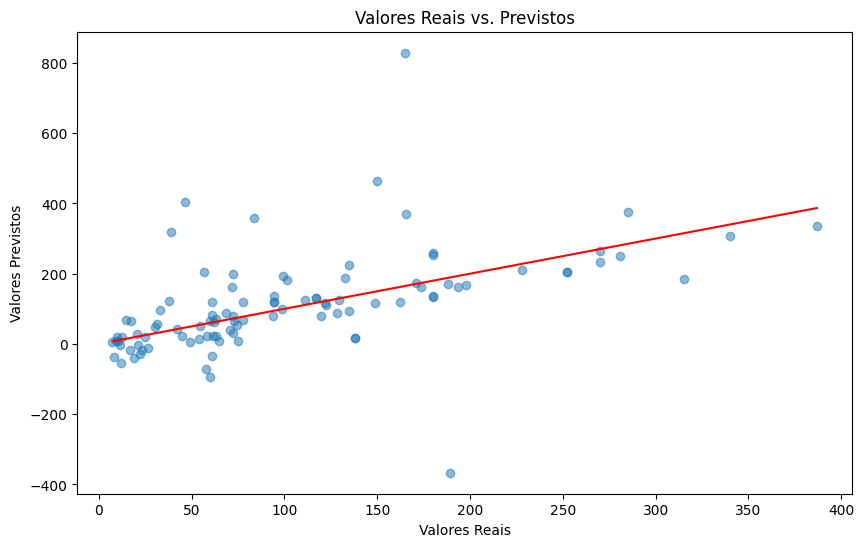

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

# Filtrando os dados para incluir apenas o mês "1" do ano de "2022"
df_vendas_dw['Data'] = pd.to_datetime(df_vendas_dw['Data'], format='%d/%m/%Y %H:%M', errors='coerce')
dados_janeiro_2022 = df_vendas_dw[(df_vendas_dw['Data'].dt.month == 1) & (df_vendas_dw['Data'].dt.year == 2020)]

# Dropando linhas com valores nulos
dados_janeiro_2022 = dados_janeiro_2022.dropna()

# Previsão de 'Fatura_Total' com base em 'Produto', 'Quantidade' e 'Preco_Unitario'
caracteristicas = ['Produto', 'Quantidade', 'Preco_Unitario']
alvo = 'Fatura_Total'

# Utilizando apenas as características e o alvo após a remoção de valores nulos
X = dados_janeiro_2022[caracteristicas]
y = dados_janeiro_2022[alvo]

# Encode da coluna 'Produto'
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[['Produto']])
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=encoder.get_feature_names_out(['Produto']))

# Resetando o index de X e y antes de dropar 'Produto'
X = X.reset_index(drop=True)  # Reset index of X
y = y.reset_index(drop=True)  # Reset index of y

# Dropando a coluna 'Produto' original e concatenando as features encodadas
X = X.drop('Produto', axis=1)
X = pd.concat([X, encoded_df], axis=1)

# X and y should com índices alinhados
# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertendo os conjuntos de treino e teste para matrizes esparsas csr_matrix
X_treino_sparse = csr_matrix(X_treino)
X_teste_sparse = csr_matrix(X_teste)

modelo = LinearRegression()
modelo.fit(X_treino_sparse, y_treino)

predicoes = modelo.predict(X_teste_sparse)
erro = mean_squared_error(y_teste, predicoes)
print("Erro médio quadrático:", erro)


plt.figure(figsize=(10, 6))
plt.scatter(y_teste, predicoes, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Previstos")
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red')  # Linha de referência (perfeito)
plt.show()

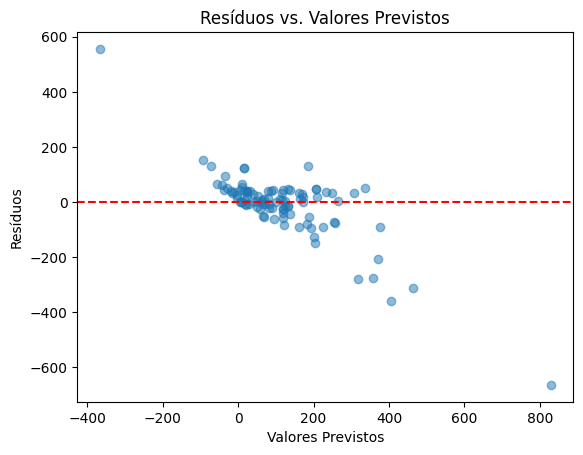

In [ ]:
plt.scatter(predicoes, residuos, alpha=0.5)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Valores Previstos")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()